## Implement Linear Regression Two Ways

In [84]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
from linear_reg import LinearRegression
from sklearn.linear_model import Lasso

In [4]:
# generate dataset
np.random.seed(1234)
def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

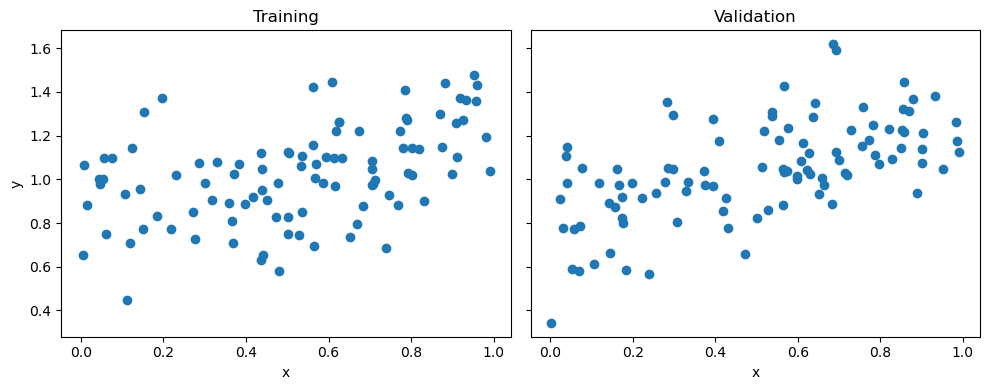

In [86]:
# plot dataset

# set variables and parameters
np.random.seed(1234)
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

After obtaining the dataset, we firstly fit the model with the anlytic method and then inspect the training score, the validation score, and the weight.

In [88]:
# analytic method
np.random.seed(1234)

LR = LinearRegression()
LR.fit(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")
LR.w

Training score = 0.2117
Validation score = 0.3233


array([0.36147991, 0.83389459])

Then, we fit the model with the regular gradient and inspect the weight. We can see that the optimized weights of the two methods are quite close.

In [89]:
# regular gradient
np.random.seed(1234)
LR_reg = LinearRegression()
LR_reg.fit_gradient(X_train, y_train, alpha = 0.001, max_epochs = 1000)
LR_reg.w

array([0.34744356, 0.84172573])

Lastly, we implement the stochastic gradient and still get a similar final weight.

In [90]:
# stochastic gradient
np.random.seed(1234)
LR_sto = LinearRegression()
LR_sto.fit(X_train, y_train, method = 'gradient', alpha = 0.001, m_epochs = 1000)
LR_sto.w

array([0.35754189, 0.83609168])

In the following graphs, we see how the score changed over time for the regular and the stochastic gradient descent respectively.

Text(0.5, 1.0, 'The Change of Score for Regular Gradient Descent')

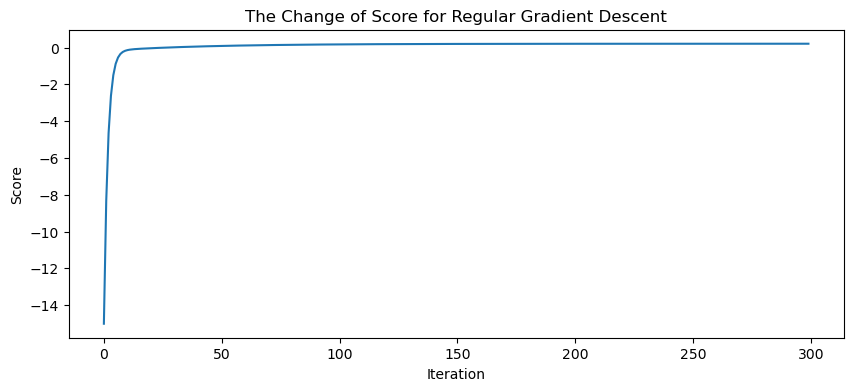

In [94]:
plt.plot(LR_reg.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")
plt.title("The Change of Score for Regular Gradient Descent")

Text(0.5, 1.0, 'The Change of Score for Stochastic Gradient Descent')

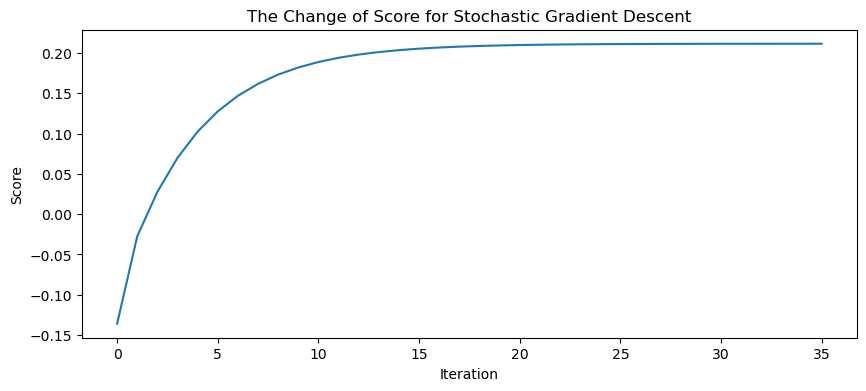

In [95]:
plt.plot(LR_sto.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")
plt.title("The Change of Score for Stochastic Gradient Descent")

## Experiments

In the experiment below, we plot the change in the training and validation scores as the number of features increases and the number of training data points remains constant (100). We see that initially, the increase in feature number leads to a higher score overall. However, as the feature number increases to around 90, the score decreases sharply. As it approaches the number of training points, despite fluctuations, it follows a decreasing trend to negative numbers, indicating poor modeling. This phenomenon illustrates that overfitting might lead to worse performance.

<function matplotlib.pyplot.show(close=None, block=None)>

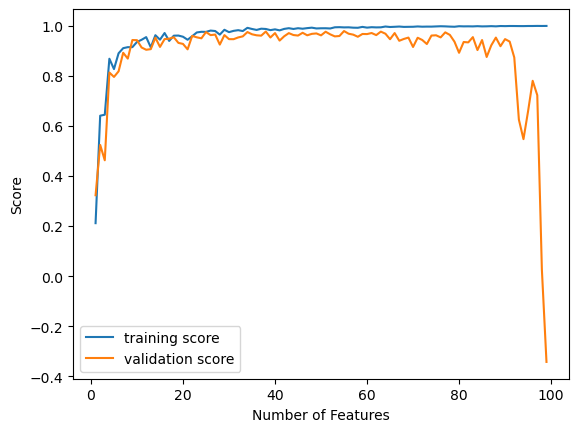

In [34]:
# create n_train and a list of p_features
np.random.seed(1234)
n_train = 100
n_val = 100
p_features_list = np.arange(1, n_train, 1).tolist() # step=1
# print(p_features_list)
noise = 0.2

# create empty lists to store training and validation scores
training_score_list = []
validation_score_list = []

for p_features in p_features_list:
    # create some data
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    
    # fit the model
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    
    # compute and append scores
    training_score = LR.score(X_train, y_train).round(4)
    validation_score = LR.score(X_val, y_val).round(4)
    training_score_list.append(training_score)
    validation_score_list.append(validation_score)

# plot
plt.plot(p_features_list, training_score_list, label = "training score")
plt.plot(p_features_list, validation_score_list, label = "validation score")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.legend(loc='best')
plt.show

## LASSO Regularization

### Implementation

In [27]:
# use lasso regularization
L = Lasso(alpha = 0.001)

# fit the model on data
p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)

Lasso(alpha=0.001)

In [26]:
# compute the score
L.score(X_val, y_val)

0.7549598289478557

### Experiments

We implement the same experiments as previously did with linear regression, increasing the number of features up to or even past n_train - 1 (In this case, n_train=100, and I increased p_features to 150). The plots show the change of score as the number of features increases, with different values for the regularization strenth alpha in each subplot.

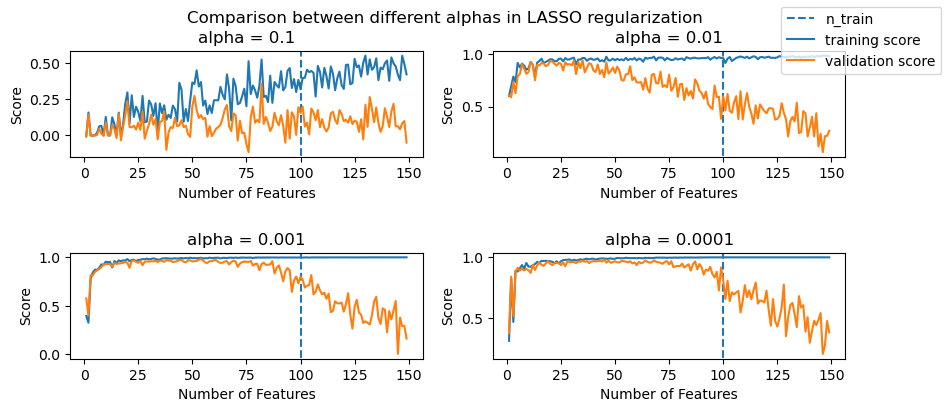

In [96]:
# create n_train and a list of p_features
np.random.seed(1234)
n_train = 100
n_val = 100
p_features_list = np.arange(1, n_train + 50, 1).tolist()
# print(p_features_list)
noise = 0.2


# set subplot parameters
fig, axarr = plt.subplots(2, 2)
fig.suptitle('Comparison between different alphas in LASSO regularization')
plt.rcParams["figure.figsize"] = (10, 4)


# initiate alpha list & axis array list
alpha_list = [0.1, 0.01, 0.001, 0.0001]
axarr_list = [(0,0), (0,1), (1,0), (1,1)]

# draw subplots
for i in range(4):
    
    # create empty lists to store training and validation scores
    training_score_list = []
    validation_score_list = []
    
    for p_features in p_features_list:
        # create data
        X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

        # fit the model
        L = Lasso(alpha = alpha_list[i])
        L.fit(X_train, y_train)

        # compute and append scores
        training_score = L.score(X_train, y_train).round(4)
        validation_score = L.score(X_val, y_val).round(4)
        training_score_list.append(training_score)
        validation_score_list.append(validation_score)
    
    # label, axis, and plot
    axarr[axarr_list[i]].set_title("alpha = " + str(alpha_list[i]))
    axarr[axarr_list[i]].set(xlabel = "Number of Features", ylabel = "Score")
    l1 = axarr[axarr_list[i]].axvline(x = n_train, ymin = -0.3, ymax = 1.1, linestyle = 'dashed', label = "n_train")
    l2 = axarr[axarr_list[i]].plot(p_features_list, training_score_list, label = "training score")
    l3 = axarr[axarr_list[i]].plot(p_features_list, validation_score_list, label = "validation score")
    
labels = ["n_train", "training score", "validation score"]
fig.legend([l1, l2, l3], labels=labels, loc="upper right")   
plt.subplots_adjust(hspace=.9)    

As alpha becomes smaller, the model tends to reach a better score and reach it more quickly. The score is also significantly higher compared to the linear regression. However, the effect of overfitting remains when the number of features is too large.